In [ ]:
#### import os, sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
import json

In [72]:
with open('/Users/sob/Desktop/gan_results/hypertuning/multivariate/16_dims_1000_samples/trial_1/results_0.001_128_256.json') as f:
    data = json.load(f)

In [134]:
with open('/Users/sob/Desktop/gan_results/mnist best/trial_24.json') as f:
    data = json.load(f)

In [137]:
data['infogan']

{'mnist': {'Wasserstein-Distance': {'parameters': [0.05, 64, 512],
   'value': [nan,
    nan,
    nan,
    nan,
    nan,
    nan,
    349522.90188746253,
    742872.8150810434,
    1214472.6224512646,
    554260.6478073336,
    nan,
    821346.6152661963,
    327341.39735487784,
    nan,
    nan,
    1820848.1998936918,
    nan,
    nan,
    nan,
    nan,
    546696.4355424255,
    nan,
    253899.46417974876,
    336739.2486793041,
    nan]},
  'Jensen-Shannon': {'parameters': [0.05, 64, 512],
   'value': [nan,
    nan,
    nan,
    nan,
    nan,
    nan,
    1.1551142838618018,
    1.1883472923528713,
    0.8860325733020766,
    1.1709251215328969,
    nan,
    0.9024803175283422,
    1.1711180664384486,
    nan,
    nan,
    1.249510860084364,
    nan,
    nan,
    nan,
    nan,
    1.135889668502682,
    nan,
    0.9946025810131568,
    1.222951577122155,
    nan]},
  'Energy-Distance': {'parameters': [0.05, 64, 512],
   'value': [nan,
    nan,
    nan,
    nan,
    nan,
    nan,
 

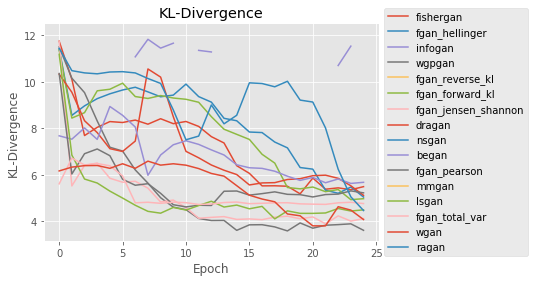

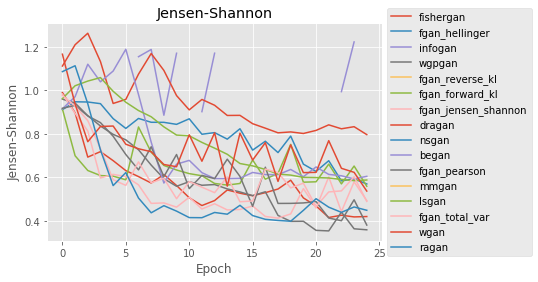

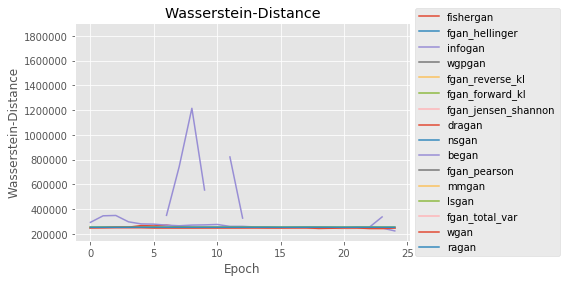

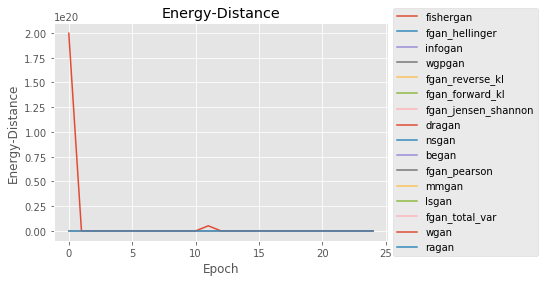

In [135]:
get_mnist_graphs(data)

In [101]:
def mean_confidence_interval(data, confidence=0.95):
    
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    
    return m, m-h, m+h

In [111]:
import numpy as np
import scipy.stats

In [115]:
# def get_confidence_intervals_multivariate(data_type, start_time, data_info):

# Get file path and files therein
mypath = "/Users/sob/Desktop/mnist_ci/mnist_best/"
files = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
results = []

# Load files
for file in files:
    with open("{}/{}".format(mypath, file)) as f:
        data = json.load(f)
    results.append(data)

# Get values for best runs
# optimal = nested_pickle_dict()
# for result in results:
#     for model, distributions in result.items():
#         for dist, metrics in distributions.items():
#             for divergence, output in metrics.items():
#                 if divergence not in optimal[model][dist]:
#                     optimal[model][dist][divergence] = {'values': []}
#                 optimal[model][dist][divergence]['values'].append(output['value'])

# # Compute 5th and 95th percentiles for each epoch
# for result in results:
#     for model, distributions in result.items():
#         for dist, metrics in distributions.items():
#             for divergence, output in metrics.items():
#                 data = np.array(optimal[model][dist][divergence]['values'])
#                 optimal[model][dist][divergence]['5'] = list(np.percentile(data, 5, axis=0))
#                 optimal[model][dist][divergence]['95'] = list(np.percentile(data, 95, axis=0))

# return optimal

In [130]:
with open('/Users/sob/Desktop/gan_results/mnist best/trial_24.json') as f:
    data = json.load(f)

In [133]:
data['wgan']

{'mnist': {'Wasserstein-Distance': {'parameters': [0.0025, 256, 1024],
   'value': [248544.6189027911,
    249987.49866998332,
    252254.07342833903,
    251620.06956822402,
    251592.4110370188,
    248107.12500977883,
    247925.08450929588,
    247681.39830483322,
    247645.9196538475,
    247993.69293831973,
    248057.11026722455,
    248000.84041534318,
    248267.67747699306,
    248510.85352834652,
    247675.56165459778,
    247591.8281279818,
    248277.26903353026,
    248481.31597904128,
    243926.6802222403,
    245222.29336337885,
    247619.3520528346,
    247752.09795747412,
    243138.37988219608,
    242830.93900016666,
    247274.61766555344]},
  'Jensen-Shannon': {'parameters': [0.005, 256, 512],
   'value': [1.1665400262552423,
    0.9372931181514849,
    0.7642610715896708,
    0.8342605550409319,
    0.8364238792125192,
    0.7526146237353367,
    0.7319116833310588,
    0.718281186388422,
    0.659538834776059,
    0.649401227535061,
    0.7961155708438321,


In [74]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [85]:
distributions = [
                 'normal',
                 'beta',
                 'exponential',
                 'gamma',
                 'gumbel',
                 'laplace',
                 ]

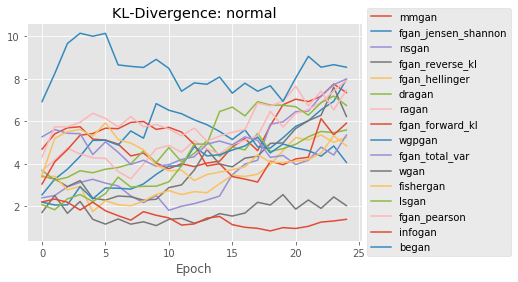

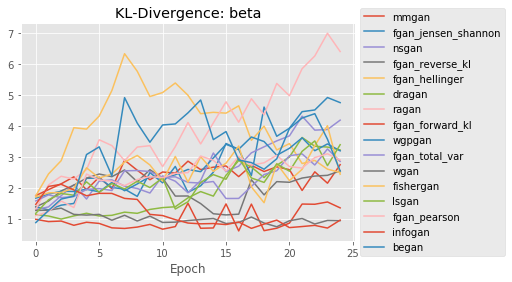

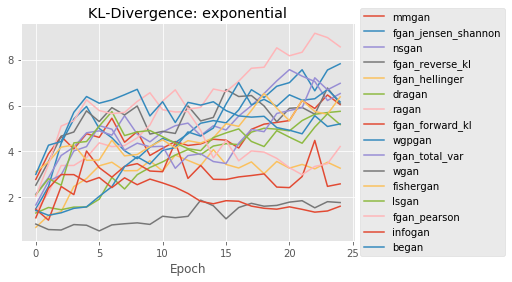

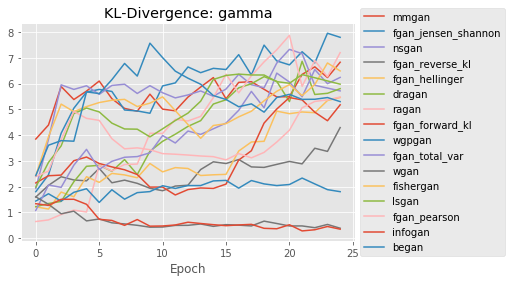

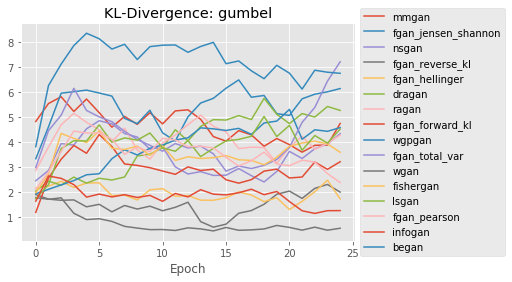

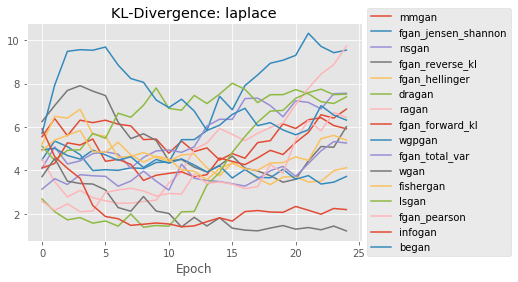

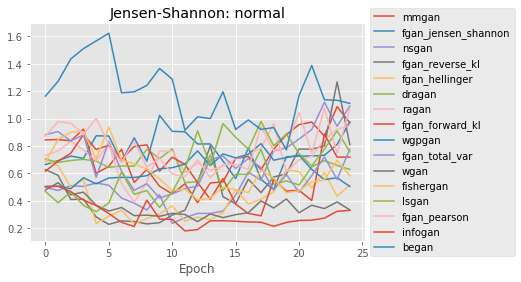

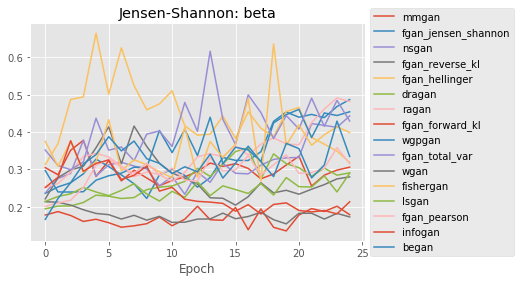

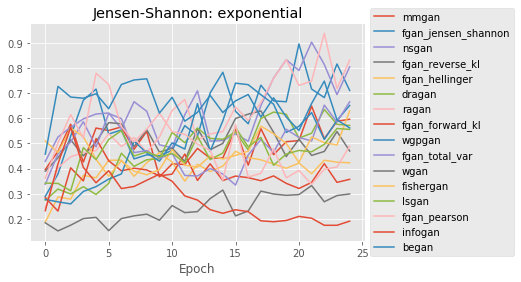

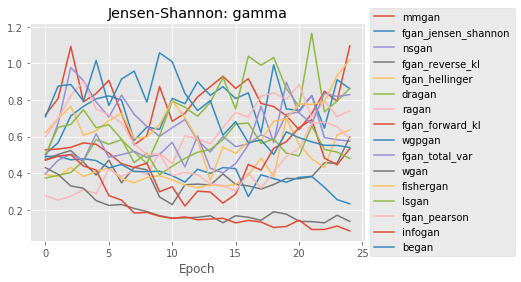

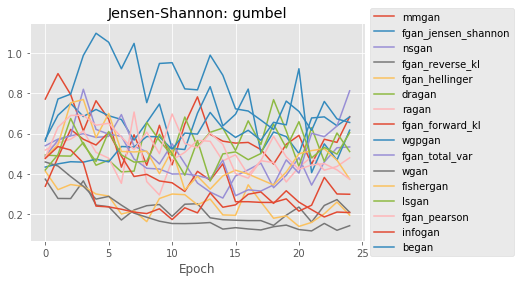

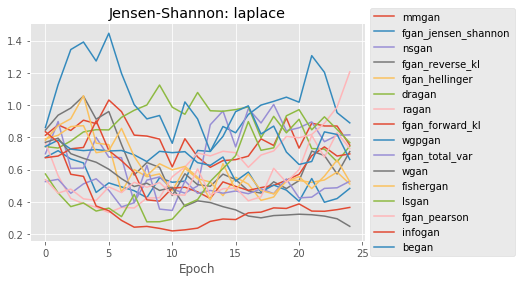

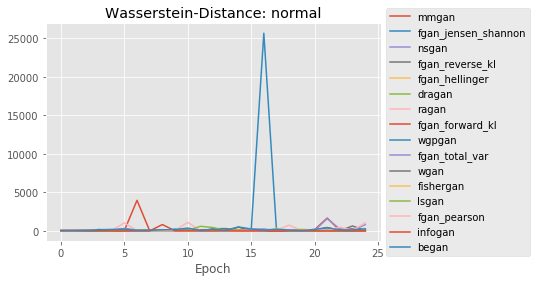

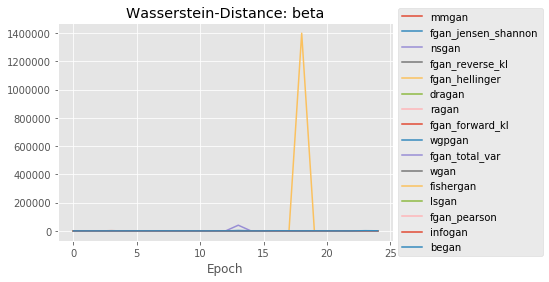

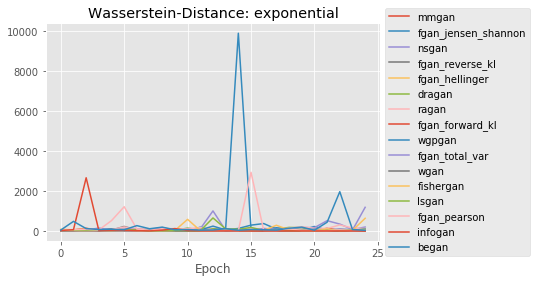

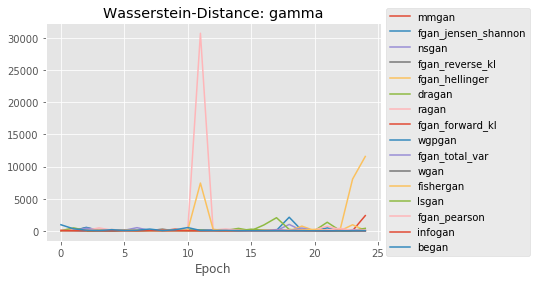

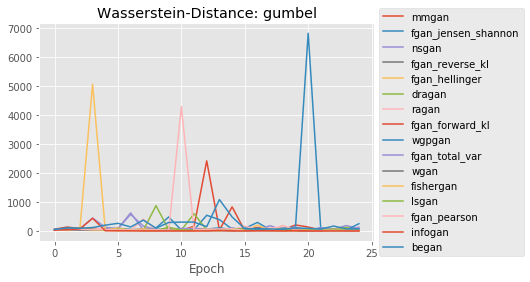

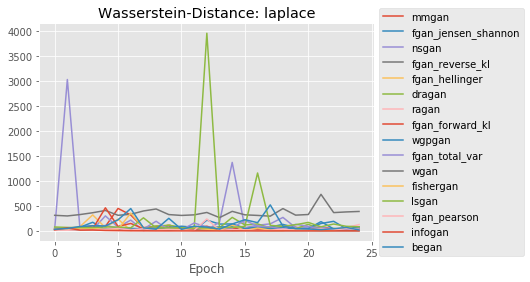

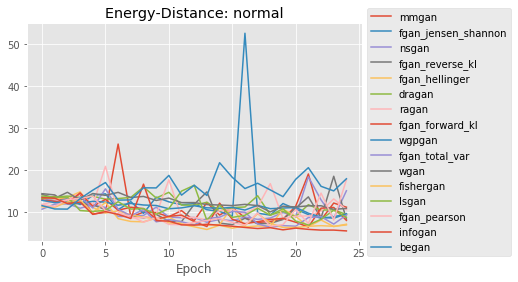

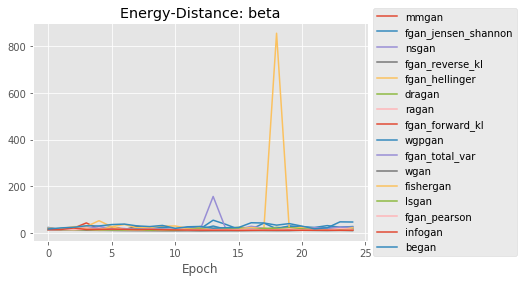

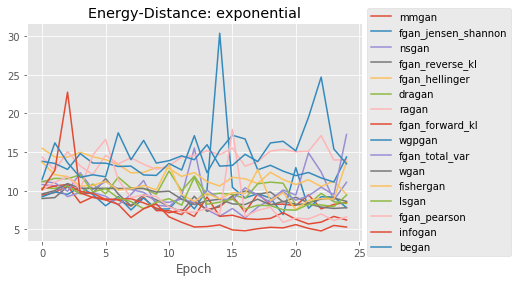

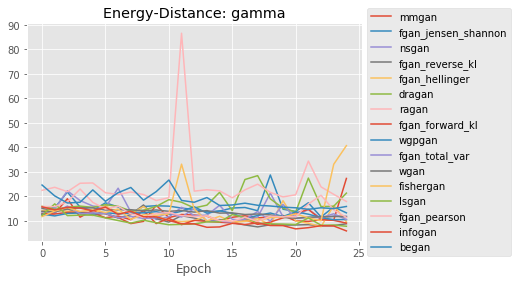

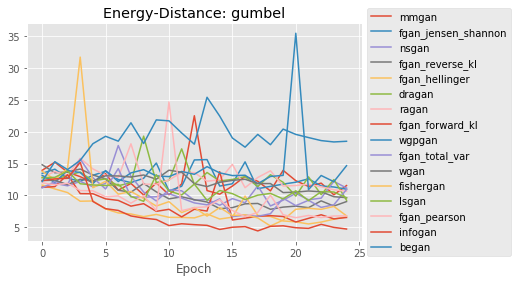

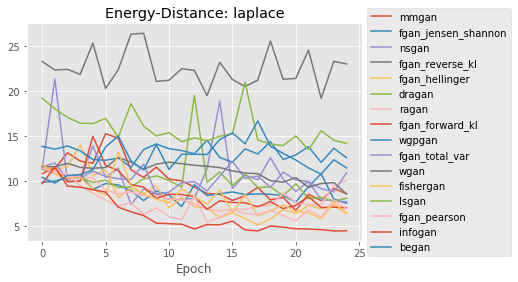

In [86]:
for div in distance_metrics:
    
    for dist in distributions:

        for model_name in data.keys():

            if model_name in ['vae', 'autoencoder']:
                continue

            plt.plot(range(len(data[model_name][dist][div])), 
                     data[model_name][dist][div], 
                     label=model_name)

            plt.xlabel("Epoch")
            plt.title("{0}: {1}".format(div, dist))
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #     plt.savefig('graphs/mnist/{1}.png'.format(dist), dpi=100)
        plt.show()

In [76]:
def get_mnist_graphs(data, distance_metrics=["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance"]):
    
    for dist in distance_metrics:

        for model_name in data.keys():

            if model_name in ['vae', 'autoencoder']:
                continue

            plt.plot(range(len(data[model_name]['mnist'][dist]['value'])), 
                     data[model_name]['mnist'][dist]['value'], 
                     label=model_name)

            plt.xlabel("Epoch")
            plt.ylabel(dist)
            plt.title("{0}".format(dist))
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #     plt.savefig('graphs/mnist/{1}.png'.format(dist), dpi=100)
        plt.show()

In [ ]:
get_mnist_graphs